# U.S. Senate Party Breakdown over Time

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ricedatasci/deep/master?filepath=docs%2Fcurriculum%2Fdocs%2Fcurriculum%2Fexamples%2Feda.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["figure.dpi"] = 150

In [3]:
plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["figure.dpi"] = 150

In [5]:
url = "https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/PEJ5QU/XXQCIK"
candidates = pd.read_csv(url, delimiter="\t")

## Winning Candidate

What does each record in our dataset represent? The winning candidate of an election or simply a candidate of an election? To determine this, we have to uniquely key an election.

Since we know that we only have US Senate races, we should be able to get this by grouping on year and state of a given election.  Then we can simply count the number of records to determine the number of participants we have recorded.

Below, we show that an election generally spans multiple records in this dataframe.  How can we index the winners?  Note that we will actually be indexing the winner of the popular vote in each election.

In [8]:
candidates.groupby(["year", "state"]).party.count()

year  state        
1976  Arizona          5
      California       5
      Connecticut      3
      Delaware         5
      Florida          2
                      ..
2018  Virginia         3
      Washington       2
      West Virginia    3
      Wisconsin        2
      Wyoming          3
Name: party, Length: 740, dtype: int64

### Identifying the Winning Candidate

To identify the winner (which we're defining as the candidate with the most votes) we need to identify which candidate has the most votes in a given election.  We've determined that we can identify an election by grouping on the year and state, so we can leverage [`#idxmax`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html) to get the indices of all winning candidates.

In [9]:
mostvotes = candidates.groupby(["year", "state"]).candidatevotes.idxmax()

# candidates that had the most votes in their election
# "fancy" indexing, mostvotes.values holds indices of rows we want to select
popular = candidates.iloc[mostvotes.values]

### Count # of Elections each Party Won

Given the winning candidate for each election, we can now aggregate by year to count the number of times a party was represented in this group.  We'll finish by plotting a line of party representation for each party by year.

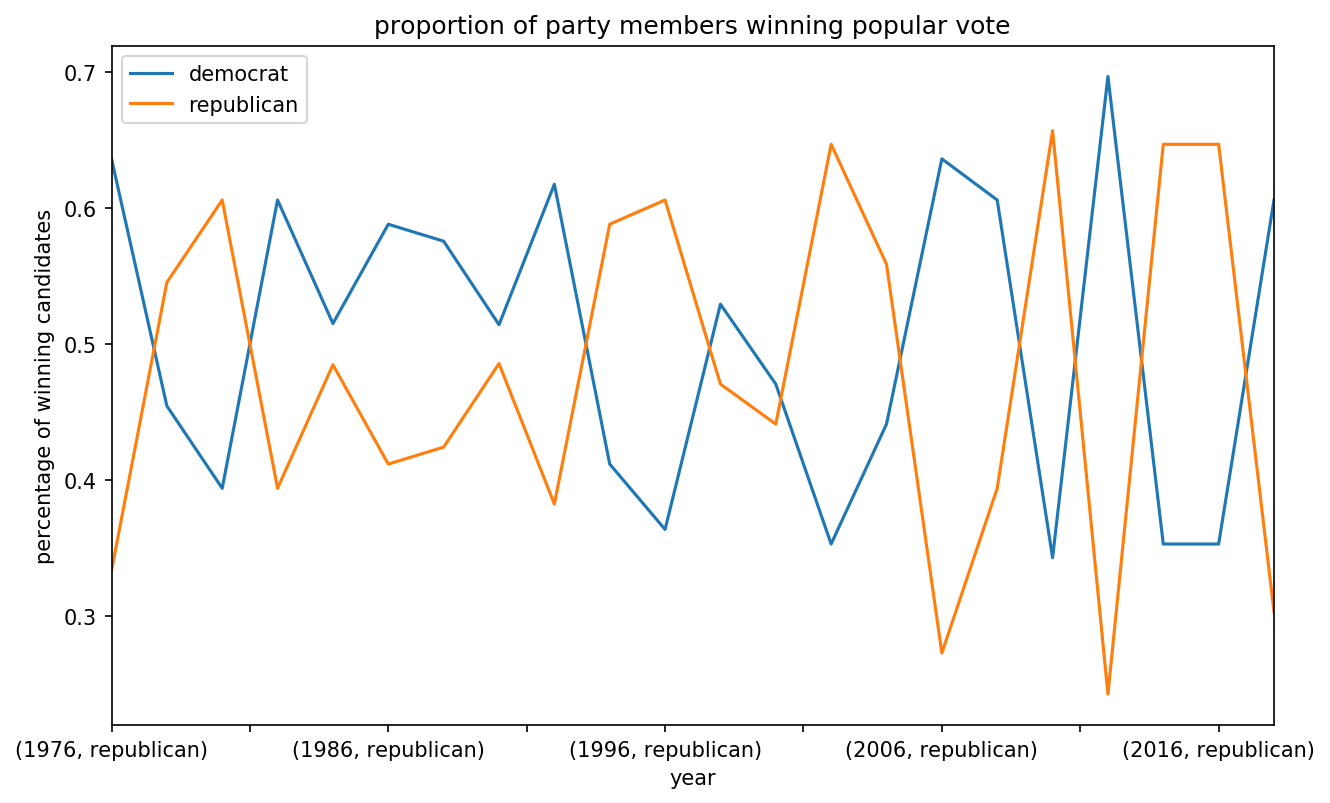

In [10]:
# get % of parties which had most votes per year
parties = popular.groupby("year").party.value_counts(normalize=True)

# iterate through the parties and plot a line for each
gb = parties.groupby("party")
# for group in gb.groups:
for group in ["democrat", "republican"]:
    group_df = gb.get_group(group)
    group_df.plot(label=group)
    
plt.title("proportion of party members winning popular vote")
plt.xlabel("year")
plt.ylabel("percentage of winning candidates")
plt.legend()